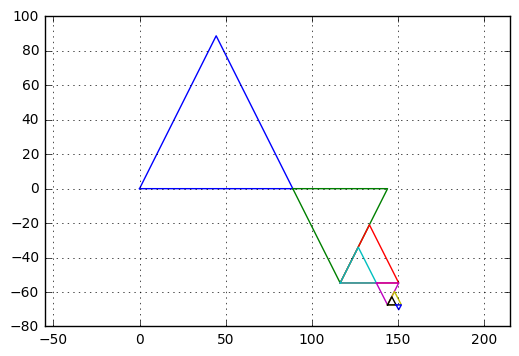

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import golden

def plot_equilateral_triangle(
        sidelength, lastlines=None,
        hingecounter=0, invertx=False, inverty=False):
    # Find equilateral triangle height by halving it and finding the long side
    # of the resulting right triangle.
    # See Google pythagorean calc search:
    #   a = sqrt(c^2 - b^2)
    #   pythagorean theorem calc: find a, b=n/a, c=n/a
    #   https://www.google.com/search?q=pythagorean+theorem+calc%3A+find+a%2C+b%3Dn%2Fa%2C+c%3Dn%2Fa
    height = np.sqrt([ sidelength**2 - (sidelength / 2.0) ])[0]

    # x1,y1 is the left vertex of the triangle, x2,y2 the right, x3,y3 the top
    startx = starty = None
    if lastlines is None:
        startx = 0
        starty = 0
    else:
        # hingecounter will be 0, 1, or 2 (left, right, or top)
        startx = lastlines[0].get_xdata()[hingecounter]
        starty = lastlines[0].get_ydata()[hingecounter]
    x1 = startx
    y1 = starty
    if invertx:
        x2 = startx + sidelength
        x3 = startx + (sidelength / 2.0)
    else:
        x2 = startx - sidelength
        x3 = startx - (sidelength / 2.0)
    y2 = starty
    if inverty:
        y3 = starty - height
    else:
        y3 = starty + height
    lines = ax.plot(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]))
    return lines

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

lastlines = None
sidelength = 89
hingecounter = 0
# Create a stack of triangles:
for i in range(0, 8):
    if hingecounter % 2 == 0:
        invertx = True
        inverty = False
    else:
        invertx = True
        inverty = True
    lastlines = plot_equilateral_triangle(
            sidelength, lastlines=lastlines,
            hingecounter=hingecounter, invertx=invertx, inverty=inverty)
    sidelength = sidelength / golden
    # Toggle hinge from left -> right -> top -> left again ...
    if hingecounter < 2:
        hingecounter +=1
    else:
        hingecounter = 0

# Don't let aspect ratio get squashed
plt.axes().set_aspect('equal', 'datalim')
plt.show()